# Is Success in the Summer Olympic Games More Dependent on a Country's Population or Wealth?

**Authors**: Jules Brettle, Shree Madan, Anusha Karandikar

Run the code below each time the notebook is started or restarted to ensure that if you change any code in the library, this notebook will use the latest version of the library code.

In [ ]:
%load_ext autoreload
%autoreload 2
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import matplotlib.pyplot as plt
import plotly.express as px
from helpers import *
from vis_helpers import *

# 1. Introduction

## 1.1 Background Information

The Summer Olympic Games are an international multi-sport event typically held every four years [1]. Each sporting event awards gold, silver, and bronze medals for first, second, and third place respectively.

## 1.2 Primary Question

The goal of this project is to answer the following question: Can success in the Summer Olympic games be predicted more accurately based on a country’s population or GDP per capita?

# 2. Methodology

## 2.1 Data Source

We chose to use Wikipedia to get data for ease of scraping and because we found it had the most thorough data. We used Wikipedia to obtain our data for Olympic medals (i.e. gold, silver, and bronze) from every Summer Olympics from 2004 to 2016 for each country participating. We also used corresponding population and GDP per capita data from Wikipedia. Wikipedia has population data from the United Status Census Bureau for every 5 years, so since the Summer Olympics occur every 4 years, we used the closest year's population data. Our GDP per capita data comes from the International Monetary Fund's (IMF) yearly estimates based on Purchasing Power Parity (PPP) from Wikipedia as well.

### 2.2 Web Scraping

To obtain our data, we used the python libraries **Beautiful_Soup** to parse HTML documents, **Requests** to handle requests, and **Pandas** for data analysis. In `helpers.py`, we use the function `table_scrape`, which takes in the url of a Wikipedia page and returns, by default, the first table of the page. We can also change the input to obtain another table on the page. Our scraping functions for medals, population, GDP per capita, and number of athletes all use `table_scrape`.

### 2.3 Obtaining Data & Cleaning

### 2.3.1 Medal Data

To get data for medals received in the 2004, 2008, 2012, and 2016 Summer Olympics, we used the function `scrape_medal_table`, which uses `table_scrape` to obtain the data and renames the medal columns to be prefaced with the specific year of the Games. `scrape_medal_table` also removes the columns with the rank of the countries. `scrape_medal_data` merges the dataframes obtained by calling `scrape_medal_table` for medal datasets for each year and only keeps countries which medal all four years.

### 2.3.2 Population Data

Similarly to `scrape_medal_data`, `scrape_population_data` calls `table_scrape` to get data from Wikipedia about the population of countries participating in all four years of the Summer Olympics that we were looking at. We used the function `clean_population_data` to perform various cleaning tasks for the population data. Since we were only using population data for the years 2005, 2010, and 2015, in `clean_population_data`, we dropped the unnecessary years and renamed the columns to contain the year of the Games we were associating with it (i.e. 2005 became Pop-2004, 2010 became Pop-2008 and was duplicated to be Pop-2012 as well, and 2015 became Pop-2016). Certain countries were also named differently by the United Status Census Bureau from their Olympic Committee names, so we had to also replace those -- we renamed Great Britain to United Kingdom and Chinese Taipei to Taiwan to match the Olympic Committee names.

### 2.3.3 GDP per Capita Data

The function `scrape_gdp_data` calls `table_scrape` to get the IMF's data about countries' GDP per capita based on Purchasing Power Parity (PPP) from Wikipedia. Like `clean_population_data`, we used a separate function `clean_gdp_data` to perform the various cleaning tasks necessary to be able to merge all our data into a single dataset. We dropped the unnecessary years to leave just 2004, 2008, 2012, and 2016, and renamed the columns to contain the year in the title. We also had to rename the United Kingdom and Taiwan to match once again. We had two special cases in Cuba and North Korea, which did not have GDP per capita data from the IMF. We chose to instead use data from the United Nations (UN) for these two countries. We did not choose to use the UN data for all countries because it was lacking more countries than the IMF data.

### 2.3.4 Athlete Data

To get data for the number of athletes participating for each country, we create a function `scrape_athlete_table` to scrape the tables and get the country names to be in the same format as the rest of the data by decoding from utf-8. `scrape_athelete_data` calls `scrape_athlete_table` for each of the desired years and merges them into one table.

### 2.3.5 Merging the Data

The function `merge_dataframes` merges all the dataframes for medals, population, GDP per capita, and number of athletes into a single master dataframe by the column country. For visualization purposes, in `pivot`, we pivoted the table longer to create separate rows for medal rankings, GDP per capita, population, and athletes for each year instead of having a separate column indicating the year. We also created a new column for success rate, i.e. total number of medals divided by the number of athletes.

### 2.3.6 Creating an Averaged Dataset

The main reason we obtained data for four separate Summer Olympic Games was to account for any outliers for a country during a specific year. To do this, we needed to average our values. In `average_data`, we created a new dataframe containing averaged values for each of our variables (medals, population, GDP per capita, and athletes) over the four years.

## 2.2 Visualizations

To avoid cluttering our visulizations, we chose to ignore countries which did not receive any medals.

To streamline our visualization creation, we created functions to assist with plotting. Since we knew we would need to plot many variables against medals, in `vis_helpers.py`, the function `medals_plot` is used for our original pivoted table (without averaged values) to create scatterplots of the inputted variable against medals. It also includes a trendline and signifies color and facets the plot by year. The function `average_medals_plot` is very similar to `medals_plot`, except that it is used for our averaged dataframe. `average_context_plot` creates a plot of GDP per capita against population. Additionally, we used the function `model_check` to find a least-squares regression line and perform quantifiable analyses of how well the models fit.

# 3. Results

## 3.1 Medals vs. Population

Below is a plot of average total medals over all four games vs. average population. The x-axis is on a log scale. Using `model_check`, we found that the R-squared value for this model is 0.165, which is not very high. The trendline skews upwards as population increases because of a few significant outliers who do very well in the Games and have high populations: United States and China. India, while having a very high population, does not earn as many medals, showing that the trend caused by the US and China is not definitive.

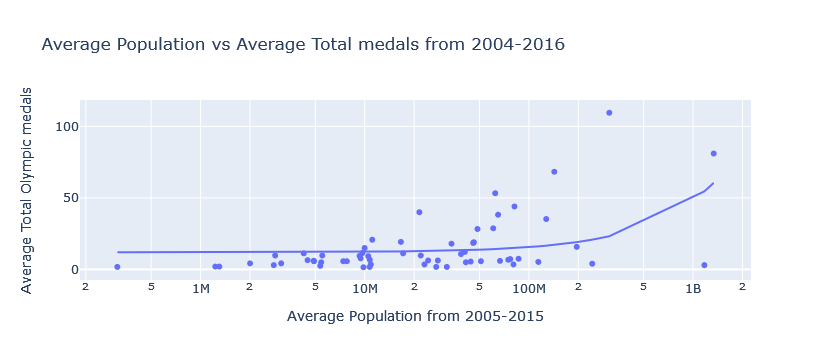

In [7]:
olympics_dataframe = pd.read_csv("data/medals_gdp_pop_athletes.csv")  # single merged dataframe
od = pivot(olympics_dataframe)  # original pivoted dataframe without averaged values
oad = average_data(olympics_dataframe)  # dataframe with averaged values
average_medals_plot(oad, "Average Pop", "Average Total")

## 3.2 Medals vs. GDP per capita

Below is a plot of average total medals over all four games vs. average GDP per capita. Using `model_check`, we found that the R-squared value for this model is 0.073, which is once again not very high and lower than the R-squared value for the medals vs. population model. Like medals vs. population, there are some outliers which perform well in the Olympic Games but have low GDPs per capita, like Russia and China. While the US has a high GDP per capita **and** performs well in the Games, outliers like Norway and Switzerland, which have high GDPs per capita and do not perform well, keep the trendline from skewing upwards as GDP per capita increases.

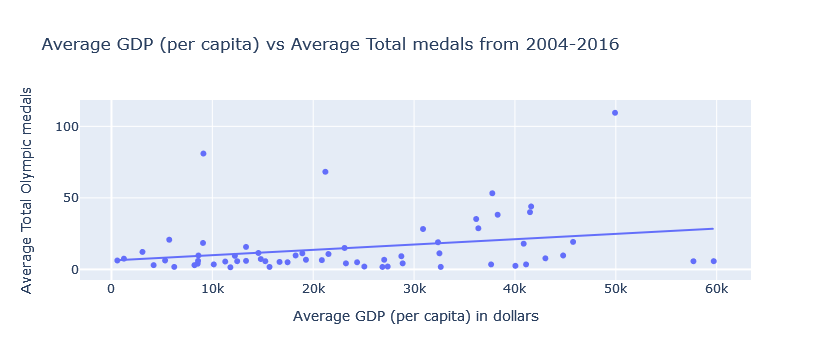

In [8]:
average_medals_plot(oad, "Average GDP", "Average Total")

## 3.3 Population vs. GDP per capita

For further context, we decided to plot population vs. GDP per capita to see whether there was any relationship between the two. We found that there was essentially no correlation. The trendline skews downwards as population increases because of two outliers, India and China.

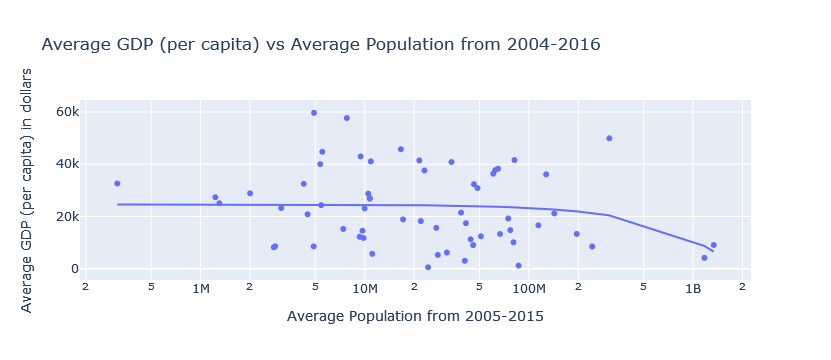

In [9]:
average_context_plot(oad)

## 3.4 Number of Athletes vs. Medals

Below is a plot of average number of athletes over all four games vs. average number of medals. The x-axis is on a log scale. The R-squared value of this model is 0.74, which is significantly higher than either population or GDP per capita against medals. This indicates the number of competitors sent by a country to the Olympics is a better predictor of the number of medals they will win than population or GDP per capita.

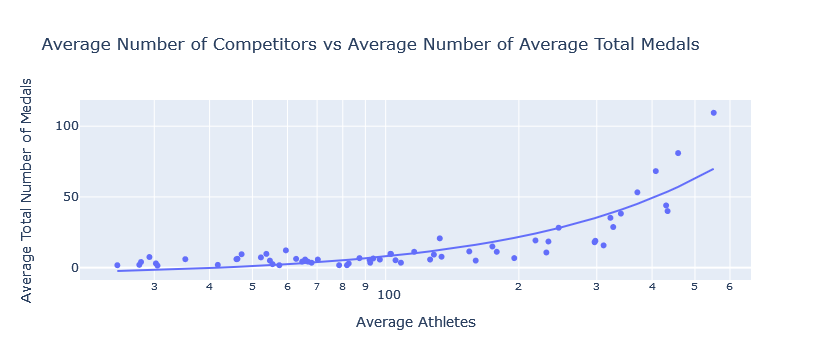

In [11]:
average_medals_plot(oad, "Average Athletes", "Average Total")

## 3.4.1 Number of Athletes vs. Medals, Faceted By Year

To observe whether this relationship was consistent during individual years of the Olympics, we created another visulization of number of athletes vs. number of medals, faceted by each year. We found that the relationship was indeed significant during each year we observed.

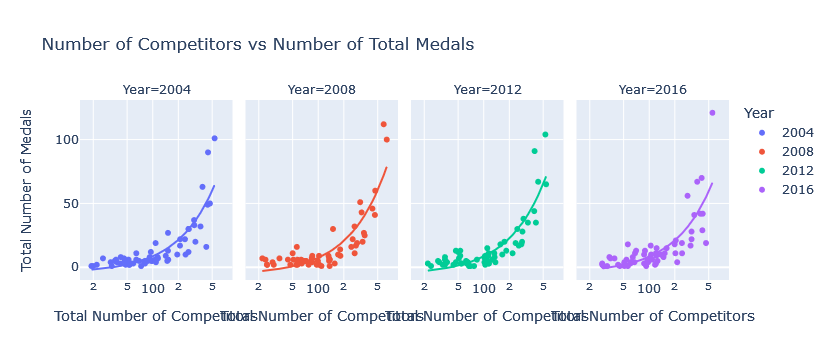

In [12]:
medals_plot(od, "Athletes", "Total")

# 4. Interpretation

# 5. Sources

[1] https://en.wikipedia.org/wiki/Summer_Olympic_Games